<a href="https://colab.research.google.com/github/Dexne/Artificial_Intelligence_Seminar/blob/main/07_MNIST_con_Scaler_PCA_SVM/MNIST_con_Scaler_PCA_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MNIST con Scaler PCA SVM

# Importamos los modulos y librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

Leemos datos

In [2]:
# Specify the delimiter and error handling
data = pd.read_csv('/content/mnist_784.csv')

In [3]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [11]:
# Definimos número de muestras
n_samples = 70000 # Dependiendo de la computadora, podemos tomar menos muestras

x = np.asanyarray(data.drop(columns=['class']))[:n_samples,:]
y = np.asanyarray(data[['class']])[:n_samples].ravel()

In [13]:
# Dividir para entrenar y pruebas
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

In [14]:
xtrain.shape

(63000, 784)

In [15]:
# Pipeline
model = Pipeline([
      ('scaler', StandardScaler()),
      ('pca', PCA(n_components=50)),
      ('svm', svm.SVC(gamma=0.0001))
])

In [16]:
# Entrenamos
model.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=50)),
                ('svm', SVC(gamma=0.0001))])

In [17]:
# metricas
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))
#Train:  0.9227619047619048
#Test:  0.9202857142857143

Train:  0.9227619047619048
Test:  0.9202857142857143


In [18]:
ypred = model.predict(xtest)

In [38]:
print('Classification report: \n', metrics.classification_report(ytest, ypred))

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       641
           1       0.93      0.97      0.95       764
           2       0.93      0.92      0.93       744
           3       0.91      0.89      0.90       702
           4       0.91      0.95      0.93       683
           5       0.88      0.88      0.88       660
           6       0.95      0.96      0.95       704
           7       0.93      0.93      0.93       710
           8       0.90      0.86      0.88       705
           9       0.90      0.87      0.89       687

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



In [39]:
print('Confusion matrix: \n', metrics.confusion_matrix(ytest, ypred))

Confusion matrix: 
 [[622   0   2   1   1   5   2   2   5   1]
 [  0 743   5   1   1   2   0   0  11   1]
 [  3   4 686   8   7   3   9   8  15   1]
 [  3   5  14 622   0  26   2   9  17   4]
 [  2   3   3   0 650   1   1   0   1  22]
 [  5   8   1  26   4 578  17   4  12   5]
 [  8   5   6   0   5   6 673   0   1   0]
 [  3   5  11   2   6   1   0 661   0  21]
 [  3  26   6  15   4  26   4   1 609  11]
 [  5   4   1   9  36   6   0  24   4 598]]


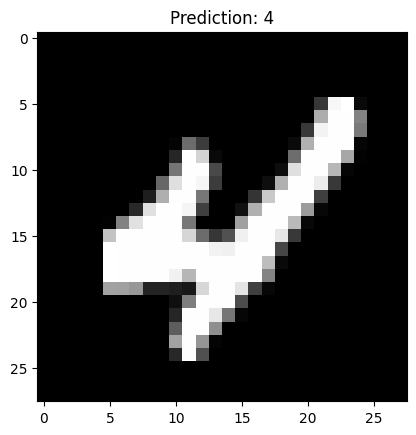

In [57]:
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Prediction: %i' % ypred[sample])
plt.show()